## Installing Dependencies

In [33]:
# Install Neural Prophet
!pip install neuralprophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Preprocessing
- Keeping only the Date and AQI columns

In [34]:
df = pd.read_csv('/content/NizamabadNorth22.csv')

df = df[['date','max_temp']]
df.drop_duplicates(subset=['date'], inplace=True)
df.info()

df2 = pd.read_csv('/content/nizamabad_101.csv')
df2.drop_duplicates(subset=['date'], inplace=True)
df2.info()

df = df[['date','max_temp']]
df.drop_duplicates(subset=['date'], inplace=True)

df2 = df2[['date','max_temp']]
df2.drop_duplicates(subset=['date'], inplace=True)

df2.info()

df2['date'] = df2['date'].str.replace('(2018|2019|2020|2021)', '2021')


WARNING - (py.warnings._showwarnmsg) - <ipython-input-34-a3eeb11d1562>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['date'] = df2['date'].str.replace('(2018|2019|2020|2021)', '2021')

  df2['date'] = df2['date'].str.replace('(2018|2019|2020|2021)', '2021')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 337
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      338 non-null    object 
 1   max_temp  338 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     275 non-null    int64  
 1   date           275 non-null    object 
 2   location       275 non-null    object 
 3   min_temp       275 non-null    float64
 4   max_temp       275 non-null    float64
 5   min_humidity   275 non-null    float64
 6   max_humidity   275 non-null    float64
 7   min_windspeed  275 non-null    float64
 8   max_windspeed  275 non-null    float64
 9   rain           275 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2

In [35]:
df = pd.concat([df2, df], ignore_index=True)
df.to_csv('/content/Nizamabad.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      613 non-null    object 
 1   max_temp  613 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.7+ KB


In [36]:
# Data Preprocessing
df['date'] = pd.to_datetime(df['date']) # Convert to datetime format
df=df.dropna() #Drop columns with null values
df.drop_duplicates(inplace=True)
df = df.rename(columns={'date': 'ds','max_temp':'y'}) # Dates must be ds
#df=df.rename(columns={'AQI':'y'}) # Target must be y
df = df[['ds', 'y']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 0 to 612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      613 non-null    datetime64[ns]
 1   y       613 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.4 KB


## Normalising the data - MinMax Scaling

In [37]:
# Data normalisation - Change the AQI into 0-1 MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
values = df['y'].values.reshape(-1, 1)
# fit the scaler to the data and transform it
scaled_values = scaler.fit_transform(values)
# assign the transformed data to the original column
df['y'] = scaled_values 

In [38]:
# Save the scaler values for forecast later
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

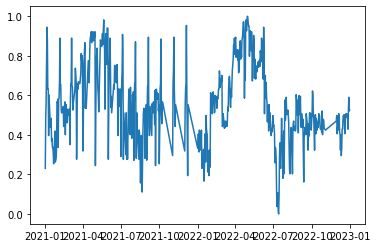

In [39]:
plt.plot(df['ds'], df['y'])
plt.show()

In [40]:
df

,ds,y
0,2021-01-01,0.230415
1,2021-01-02,0.483871
2,2021-01-03,0.566820
3,2021-01-04,0.774194
4,2021-01-05,0.944700
...,...,...
608,2022-12-27,0.428571
609,2022-12-28,0.525346
610,2022-12-29,0.589862
611,2022-12-30,0.520737


In [41]:
#define the model and parameters
from neuralprophet import NeuralProphet
m = NeuralProphet(
    n_changepoints=100,
    trend_reg=4,
    yearly_seasonality=4,
    weekly_seasonality=False,
    daily_seasonality=False,

)
#metrics = m.fit(df, freq="D")
#forecast = m.predict(df)

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
INFO:NP.config:Note: Trend changepoint regularization is experimental.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.553% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.553% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.687% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.687% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is e

Finding best initial lr:   0%|          | 0/220 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

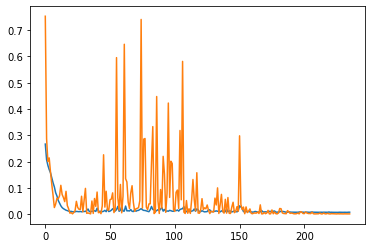

In [42]:
# Train-Test Split and,Train the model
df_train, df_test = m.split_df(df, freq="D", valid_p=1.0 / 12)
metrics = m.fit(df_train, freq="D", validation_df=df_test, progress="plot")

In [43]:
metrics.tail(1)

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
235,0.044999,0.056036,0.001906,0.0,235,0.103433,0.132785,0.008263,0.0


In [44]:
# import torch

# # ...

# # Save the model to a file
# torch.save(m.model.state_dict(), 'model.pth')

In [45]:
# model = NeuralProphet(
#     n_changepoints=100,
#     trend_reg=2,
#     yearly_seasonality=3,
#     weekly_seasonality=3,
#     daily_seasonality=False
# )
# torch.load('model.pth')
# model.model.load_state_dict(torch.load('model.pth'))

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.687% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.687% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.687% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.687% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 36it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


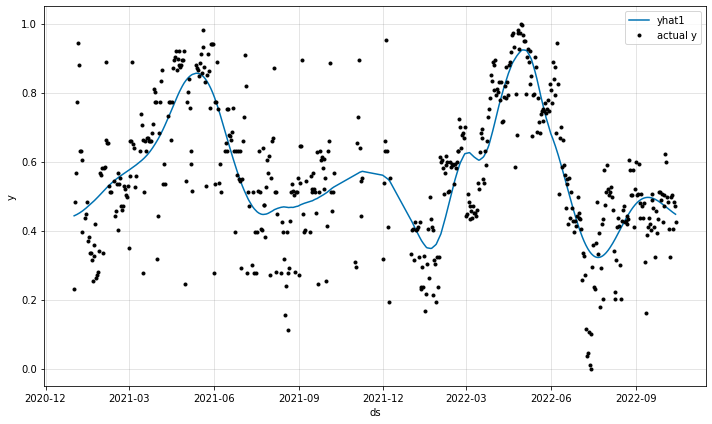

In [46]:
forecast_train = m.predict(df_train)
fig = m.plot(forecast_train)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 94.118% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 94.118% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 94.118% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 94.118% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 36it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


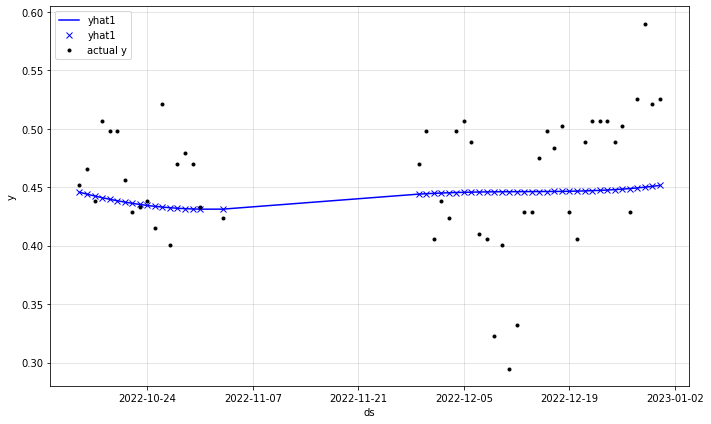

In [47]:
forecast_test = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast_test[-7 * 24 :])

In [48]:
df_test
t1_actual = scaler.inverse_transform([df_test['y']])
print(t1_actual)

[[33.3 33.6 33.  34.5 34.3 34.3 33.4 32.8 32.9 33.  32.5 34.8 32.2 33.7
  33.9 33.7 32.9 32.7 33.7 34.3 32.3 33.  32.7 34.3 34.5 34.1 32.4 32.3
  30.5 32.2 29.9 30.7 32.8 32.8 33.8 34.3 34.  34.4 32.8 32.3 34.1 34.5
  34.5 34.5 34.1 34.4 32.8 34.9 36.3 34.8 34.9]]


In [49]:
#forecast
t1_pred= scaler.inverse_transform([forecast_test['yhat1']])
print(t1_pred)

[[33.17164968 33.136122   33.10251052 33.07090255 33.04137181 33.01397393
  32.98876063 32.96576231 32.94499968 32.92647918 32.91019825 32.89613618
  32.88426646 32.87454899 32.86693332 32.86135803 32.85775198 32.85792853
  33.13678747 33.14418842 33.15083531 33.15673137 33.16189212 33.16634536
  33.17012151 33.17326646 33.17583002 33.17787233 33.17945871 33.18066547
  33.1815741  33.18227513 33.18285653 33.18342111 33.18407299 33.18491889
  33.18607068 33.18763895 33.18974205 33.19249704 33.19602032 33.2004283
  33.20584061 33.21236851 33.22012515 33.22922178 33.23976316 33.25184695
  33.26557661 33.28103945 33.2983202 ]]


In [50]:
# Calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(t1_actual, t1_pred) #transformed values

0.029249701177165455

In [51]:
mean_absolute_percentage_error(df_test['y'], forecast_test['yhat1'])

0.10142856897028561

In [52]:
print(len(t1_actual[0]), len(t1_pred[0]))

51 51


In [53]:
# Compare the predicted value vs actual value
data = {'actual': t1_actual[0], 'prediction': t1_pred[0]}
# create a DataFrame from the dictionary
df1 = pd.DataFrame(data)

In [54]:
df = pd.read_csv('/content/NizamabadNorth22.csv')
df = df[['date','max_temp']]
df.drop_duplicates(subset=['date'], inplace=True)

df['date'] = pd.to_datetime(df['date']) # Convert to datetime format
df=df.dropna() #Drop columns with null values
df.drop_duplicates(inplace=True)
df = df.rename(columns={'date': 'ds','max_temp':'y'}) # Dates must be ds
#df=df.rename(columns={'AQI':'y'}) # Target must be y
df = df[['ds', 'y']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 337
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      338 non-null    datetime64[ns]
 1   y       338 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.9 KB


In [55]:
import pickle
pkl_path = "/content/model.pkl"
with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(m, f)



In [56]:
# Forecast for more days
future = m.make_future_dataframe(df, periods=1500)
forecast_more_years = m.predict(future)
forecast_more_years

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.112% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.112% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.933% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.933% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 36it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly
0,2023-01-01,None,0.452419,0.569686,-0.117267
1,2023-01-02,None,0.453394,0.570318,-0.116924
2,2023-01-03,None,0.454462,0.570950,-0.116489
3,2023-01-04,None,0.455626,0.571583,-0.115957
4,2023-01-05,None,0.456889,0.572215,-0.115326
...,...,...,...,...,...
1495,2027-02-04,None,1.458997,1.514993,-0.055996
1496,2027-02-05,None,1.462341,1.515625,-0.053284
1497,2027-02-06,None,1.465678,1.516258,-0.050580
1498,2027-02-07,None,1.469003,1.516890,-0.047887


In [57]:
# Save forecast
# save the dataframe
forecast_more_years.to_pickle("/content/forecast.pkl")
print("*** Data Saved ***")

*** Data Saved ***


In [58]:
# read the Prophet model object
with open(pkl_path, 'rb') as f:
    m = pickle.load(f)

fcast = pd.read_pickle("/content/forecast.pkl")

In [59]:
fcast

,ds,y,yhat1,trend,season_yearly
0,2023-01-01,None,0.452419,0.569686,-0.117267
1,2023-01-02,None,0.453394,0.570318,-0.116924
2,2023-01-03,None,0.454462,0.570950,-0.116489
3,2023-01-04,None,0.455626,0.571583,-0.115957
4,2023-01-05,None,0.456889,0.572215,-0.115326
...,...,...,...,...,...
1495,2027-02-04,None,1.458997,1.514993,-0.055996
1496,2027-02-05,None,1.462341,1.515625,-0.053284
1497,2027-02-06,None,1.465678,1.516258,-0.050580
1498,2027-02-07,None,1.469003,1.516890,-0.047887


In [60]:
extract_ds=forecast_more_years['ds']
df_extract_ds=pd.DataFrame(extract_ds)
df_extract_ds

,ds
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
...,...
1495,2027-02-04
1496,2027-02-05
1497,2027-02-06
1498,2027-02-07


In [61]:
#forecast
final_forecast= scaler.inverse_transform([forecast_more_years['yhat1']])
print(final_forecast)

[[33.31749646 33.33864195 33.3618194  ... 55.30521209 55.37736945
  55.44918017]]


In [62]:
df = pd.DataFrame(final_forecast[0],)
df

,0
0,33.317496
1,33.338642
2,33.361819
3,33.387084
4,33.414484
...,...
1495,55.160243
1496,55.232801
1497,55.305212
1498,55.377369


In [63]:
merged_df = pd.concat([df_extract_ds,df], axis=1)
merged_df

,ds,0
0,2023-01-01,33.317496
1,2023-01-02,33.338642
2,2023-01-03,33.361819
3,2023-01-04,33.387084
4,2023-01-05,33.414484
...,...,...
1495,2027-02-04,55.160243
1496,2027-02-05,55.232801
1497,2027-02-06,55.305212
1498,2027-02-07,55.377369


In [64]:
merged_df.to_csv('/content/NizamabadMaxTpredict.csv')